In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import BatchNormalization
from scipy.interpolate import splrep, splev
import math

In [2]:
train_data = pd.read_csv('ssss32.csv', encoding='cp949')
test_data = pd.read_csv('ssss42.csv', encoding='cp949')

In [3]:
line_num2=[]
line_num2.append(train_data.index[train_data['노선명'] == '1호선'].tolist())
    
train_data = train_data.loc[line_num2[0]]

line_num2=[]
line_num2.append(train_data.index[train_data['역명'] == '종로3가'].tolist())

train_data = train_data.loc[line_num2[0]]
train_data = train_data.reset_index(drop=True)
train_data = train_data.reset_index()
train_data['index'] = (train_data['index'] / (len(train_data['index'])-1)) * 4 * np.pi
train_data['index2'] = np.sin(train_data['index'])

In [4]:
example=[0]
for i in range(len(train_data['index2'])-1):
    example.append(train_data['index2'][i+1]-train_data['index2'][i])
train_data['index3'] = example

In [5]:
line_num2=[]
line_num2.append(test_data.index[test_data['노선명'] == '1호선'].tolist())
    
test_data = test_data.loc[line_num2[0]]

line_num2=[]
line_num2.append(test_data.index[test_data['역명'] == '종로3가'].tolist())

test_data = test_data.loc[line_num2[0]]
test_data = test_data.reset_index(drop=True)
test_data = test_data.reset_index()
test_data['index'] = (test_data['index'] / (len(test_data['index'])-1)) * 2 * np.pi
test_data['index2'] = np.sin(test_data['index'])

In [6]:
example=[0]
for i in range(len(test_data['index2'])-1):
    example.append(test_data['index2'][i+1]-test_data['index2'][i])
test_data['index3'] = example

In [7]:
train_data = train_data[['사용일자', 'index2', 'index3', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']]
train_data.columns = ['사용일자', '사용일자sin', '사용일자chg', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']
test_data = test_data[['사용일자', 'index2', 'index3', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']]
test_data.columns = ['사용일자', '사용일자sin', '사용일자chg', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']

In [8]:
train_data

,사용일자,사용일자sin,사용일자chg,노선명,역명,승차총승객수,하차총승객수,승차유임승객수,하차유임승객수,총생활인구수,...,단기체류외국인인구수,서울외유입인구수,엘리베이터,에스컬레이터,휠체어리프트,이동식 안전발판,전동휠체어급속충전기,장애인 화장실,물품보관함,유아수유실
0,2018-04-05,0.000000e+00,0.000000,1호선,종로3가,0.34279,0.32287,0.218706,0.205996,0.399179,...,0.168519,0.093569,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
1,2018-04-06,1.767330e-02,0.017673,1호선,종로3가,0.37596,0.35920,0.239869,0.229175,0.401912,...,0.207811,0.094086,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
2,2018-04-07,3.534108e-02,0.017668,1호선,종로3가,0.33628,0.32571,0.214552,0.207808,0.344324,...,0.215921,0.080534,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
3,2018-04-08,5.299782e-02,0.017657,1호선,종로3가,0.22075,0.19903,0.140842,0.126984,0.309127,...,0.189809,0.060445,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
4,2018-04-09,7.063800e-02,0.017640,1호선,종로3가,0.36105,0.33383,0.230356,0.212989,0.394722,...,0.167326,0.094506,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2020-03-27,-7.063800e-02,0.017618,1호선,종로3가,0.22492,0.21854,0.145105,0.140989,0.303998,...,0.053858,0.059636,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
708,2020-03-28,-5.299782e-02,0.017640,1호선,종로3가,0.15272,0.15052,0.098526,0.097107,0.256160,...,0.051291,0.035983,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
709,2020-03-29,-3.534108e-02,0.017657,1호선,종로3가,0.09601,0.08871,0.061940,0.057230,0.241236,...,0.054573,0.027410,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1
710,2020-03-30,-1.767330e-02,0.017668,1호선,종로3가,0.21962,0.20707,0.141686,0.133589,0.304094,...,0.051611,0.063749,0.3,0.04,0.1,0.1,0.0,0.1,0.2,0.1


# 모델1

In [9]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [10]:
X = tf.keras.layers.Input(shape=[17]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [11]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 1s 610us/step - loss: 0.0075
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 7.3680e-04
Epoch 3/1000
23/23 [==============================] - 0s 546us/step - loss: 6.2000e-04
Epoch 4/1000
23/23 [==============================] - 0s 500us/step - loss: 4.7366e-04
Epoch 5/1000
23/23 [==============================] - 0s 500us/step - loss: 3.2732e-04
Epoch 6/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4871e-04
Epoch 7/1000
23/23 [==============================] - 0s 546us/step - loss: 2.3840e-04
Epoch 8/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6028e-04
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9635e-04
Epoch 10/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6012e-04
Epoch 11/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6098e-04
Epoch 12/1000
23/23 [========================

23/23 [==============================] - 0s 500us/step - loss: 3.6127e-05
Epoch 187/1000
23/23 [==============================] - 0s 500us/step - loss: 4.5344e-05
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 3.3358e-05
Epoch 189/1000
23/23 [==============================] - 0s 546us/step - loss: 4.0691e-05
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 3.8387e-05
Epoch 191/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8964e-05
Epoch 192/1000
23/23 [==============================] - 0s 546us/step - loss: 4.1588e-05
Epoch 193/1000
23/23 [==============================] - 0s 546us/step - loss: 3.6695e-05
Epoch 194/1000
23/23 [==============================] - 0s 500us/step - loss: 3.2691e-05
Epoch 195/1000
23/23 [==============================] - 0s 546us/step - loss: 4.2582e-05
Epoch 196/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7509e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.4244e-05
Epoch 371/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8553e-05
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8948e-05
Epoch 373/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6452e-05
Epoch 374/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3697e-05
Epoch 375/1000
23/23 [==============================] - 0s 546us/step - loss: 2.8073e-05
Epoch 376/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9032e-05
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7900e-05
Epoch 378/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4150e-05
Epoch 379/1000
23/23 [==============================] - 0s 546us/step - loss: 2.5550e-05
Epoch 380/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6791e-05
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 2.7869e-05
Epoch 555/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0635e-05
Epoch 556/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4202e-05
Epoch 557/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1513e-05
Epoch 558/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4494e-05
Epoch 559/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4127e-05
Epoch 560/1000
23/23 [==============================] - 0s 546us/step - loss: 2.3401e-05
Epoch 561/1000
23/23 [==============================] - 0s 546us/step - loss: 2.1545e-05
Epoch 562/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4869e-05
Epoch 563/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3341e-05
Epoch 564/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3529e-05
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 2.5680e-05
Epoch 739/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6820e-05
Epoch 740/1000
23/23 [==============================] - 0s 500us/step - loss: 1.7773e-05
Epoch 741/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0199e-05
Epoch 742/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2921e-05
Epoch 743/1000
23/23 [==============================] - 0s 546us/step - loss: 1.6844e-05
Epoch 744/1000
23/23 [==============================] - 0s 591us/step - loss: 2.2585e-05
Epoch 745/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0740e-05
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1310e-05
Epoch 747/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0598e-05
Epoch 748/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0632e-05
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 1.6886e-05
Epoch 923/1000
23/23 [==============================] - 0s 546us/step - loss: 1.5858e-05
Epoch 924/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0447e-05
Epoch 925/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6019e-05
Epoch 926/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8417e-05
Epoch 927/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8327e-05
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6770e-05
Epoch 929/1000
23/23 [==============================] - 0s 546us/step - loss: 1.6033e-05
Epoch 930/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1259e-05
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6668e-05
Epoch 932/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8676e-05
Epoch 933/1000
23/23 [==============

In [12]:
pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.006936854712953129

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.006186729570847402

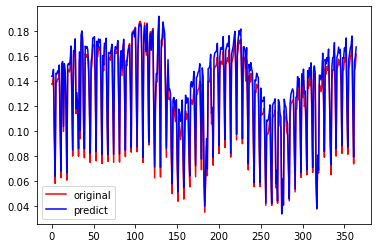

In [15]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델111.png')
plt.show()

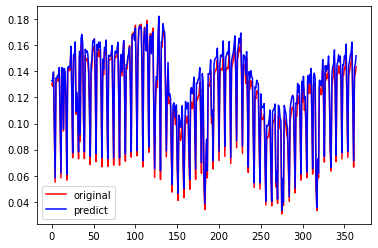

In [16]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델112.png')
plt.show()

# 모델2

In [17]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [18]:
X = tf.keras.layers.Input(shape=[15]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [19]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 0s 591us/step - loss: 0.0107
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0016
Epoch 3/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0015
Epoch 4/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0013
Epoch 5/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0013
Epoch 6/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0011
Epoch 7/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0010
Epoch 8/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0010
Epoch 9/1000
23/23 [==============================] - 0s 591us/step - loss: 9.2834e-04
Epoch 10/1000
23/23 [==============================] - 0s 546us/step - loss: 8.8195e-04
Epoch 11/1000
23/23 [==============================] - 0s 546us/step - loss: 8.4805e-04
Epoch 12/1000
23/23 [==============================] - 0s 500us/step - lo

23/23 [==============================] - 0s 546us/step - loss: 3.4179e-04
Epoch 187/1000
23/23 [==============================] - 0s 500us/step - loss: 3.7426e-04
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 3.2539e-04
Epoch 189/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7026e-04
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 3.1432e-04
Epoch 191/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7642e-04
Epoch 192/1000
23/23 [==============================] - 0s 823us/step - loss: 3.3216e-04
Epoch 193/1000
23/23 [==============================] - 0s 546us/step - loss: 3.3963e-04
Epoch 194/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7477e-04
Epoch 195/1000
23/23 [==============================] - 0s 546us/step - loss: 3.5180e-04
Epoch 196/1000
23/23 [==============================] - 0s 546us/step - loss: 3.5407e-04
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 3.0466e-04
Epoch 371/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7823e-04
Epoch 372/1000
23/23 [==============================] - 0s 546us/step - loss: 2.7928e-04
Epoch 373/1000
23/23 [==============================] - 0s 546us/step - loss: 2.8767e-04
Epoch 374/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1060e-04
Epoch 375/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6996e-04
Epoch 376/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8663e-04
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6706e-04
Epoch 378/1000
23/23 [==============================] - 0s 546us/step - loss: 3.1083e-04
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7800e-04
Epoch 380/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9202e-04
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.6831e-04
Epoch 555/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6794e-04
Epoch 556/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4969e-04
Epoch 557/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6887e-04
Epoch 558/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7787e-04
Epoch 559/1000
23/23 [==============================] - 0s 500us/step - loss: 2.5362e-04
Epoch 560/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6356e-04
Epoch 561/1000
23/23 [==============================] - 0s 500us/step - loss: 2.5630e-04
Epoch 562/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6299e-04
Epoch 563/1000
23/23 [==============================] - 0s 500us/step - loss: 2.5665e-04
Epoch 564/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6590e-04
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 152us/step - loss: 2.5888e-04
Epoch 739/1000
23/23 [==============================] - 0s 570us/step - loss: 2.4662e-04
Epoch 740/1000
23/23 [==============================] - 0s 183us/step - loss: 2.3168e-04
Epoch 741/1000
23/23 [==============================] - 0s 528us/step - loss: 2.4880e-04
Epoch 742/1000
23/23 [==============================] - 0s 510us/step - loss: 2.4416e-04
Epoch 743/1000
23/23 [==============================] - 0s 587us/step - loss: 2.4720e-04
Epoch 744/1000
23/23 [==============================] - 0s 561us/step - loss: 2.4278e-04
Epoch 745/1000
23/23 [==============================] - 0s 629us/step - loss: 2.5383e-04
Epoch 746/1000
23/23 [==============================] - 0s 213us/step - loss: 2.3692e-04
Epoch 747/1000
23/23 [==============================] - 0s 457us/step - loss: 2.5407e-04
Epoch 748/1000
23/23 [==============================] - 0s 574us/step - loss: 2.4865e-04
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.3922e-04
Epoch 923/1000
23/23 [==============================] - 0s 546us/step - loss: 2.3311e-04
Epoch 924/1000
23/23 [==============================] - 0s 546us/step - loss: 2.3950e-04
Epoch 925/1000
23/23 [==============================] - 0s 546us/step - loss: 2.3337e-04
Epoch 926/1000
23/23 [==============================] - 0s 500us/step - loss: 2.2945e-04
Epoch 927/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4158e-04
Epoch 928/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4118e-04
Epoch 929/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3323e-04
Epoch 930/1000
23/23 [==============================] - 0s 500us/step - loss: 2.5078e-04
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4493e-04
Epoch 932/1000
23/23 [==============================] - 0s 391us/step - loss: 2.4801e-04
Epoch 933/1000
23/23 [==============

In [20]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.020134911344509208

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.016016687529850283

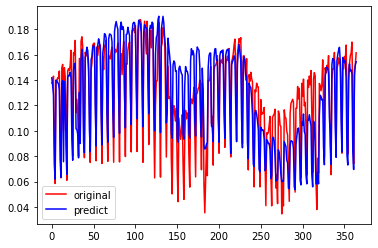

In [23]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델121.png')
plt.show()

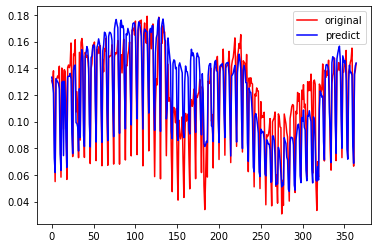

In [24]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델122.png')
plt.show()

# 모델3

In [25]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [26]:
X = tf.keras.layers.Input(shape=[12]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [27]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 1s 591us/step - loss: 0.0126
Epoch 2/1000
23/23 [==============================] - 0s 591us/step - loss: 0.0012
Epoch 3/1000
23/23 [==============================] - 0s 546us/step - loss: 9.1811e-04
Epoch 4/1000
23/23 [==============================] - 0s 591us/step - loss: 6.1568e-04
Epoch 5/1000
23/23 [==============================] - 0s 546us/step - loss: 3.3506e-04
Epoch 6/1000
23/23 [==============================] - 0s 546us/step - loss: 1.6309e-04
Epoch 7/1000
23/23 [==============================] - 0s 544us/step - loss: 9.1297e-05
Epoch 8/1000
23/23 [==============================] - 0s 546us/step - loss: 8.7144e-05
Epoch 9/1000
23/23 [==============================] - 0s 546us/step - loss: 8.0792e-05
Epoch 10/1000
23/23 [==============================] - 0s 546us/step - loss: 9.8382e-05
Epoch 11/1000
23/23 [==============================] - 0s 546us/step - loss: 6.3361e-05
Epoch 12/1000
23/23 [============================

23/23 [==============================] - 0s 500us/step - loss: 3.6446e-05
Epoch 187/1000
23/23 [==============================] - 0s 546us/step - loss: 3.8741e-05
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8367e-05
Epoch 189/1000
23/23 [==============================] - 0s 500us/step - loss: 4.1681e-05
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 3.3083e-05
Epoch 191/1000
23/23 [==============================] - 0s 500us/step - loss: 4.2585e-05
Epoch 192/1000
23/23 [==============================] - 0s 546us/step - loss: 4.2694e-05
Epoch 193/1000
23/23 [==============================] - 0s 500us/step - loss: 3.5849e-05
Epoch 194/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7299e-05
Epoch 195/1000
23/23 [==============================] - 0s 546us/step - loss: 4.1854e-05
Epoch 196/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7067e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 591us/step - loss: 2.5344e-05
Epoch 371/1000
23/23 [==============================] - 0s 546us/step - loss: 3.0688e-05
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6934e-05
Epoch 373/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8436e-05
Epoch 374/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9595e-05
Epoch 375/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9114e-05
Epoch 376/1000
23/23 [==============================] - 0s 591us/step - loss: 2.5535e-05
Epoch 377/1000
23/23 [==============================] - 0s 591us/step - loss: 2.9774e-05
Epoch 378/1000
23/23 [==============================] - 0s 546us/step - loss: 3.3134e-05
Epoch 379/1000
23/23 [==============================] - 0s 546us/step - loss: 2.5137e-05
Epoch 380/1000
23/23 [==============================] - 0s 500us/step - loss: 2.5843e-05
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.3279e-05
Epoch 555/1000
23/23 [==============================] - 0s 591us/step - loss: 2.1686e-05
Epoch 556/1000
23/23 [==============================] - 0s 591us/step - loss: 2.5454e-05
Epoch 557/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4753e-05
Epoch 558/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4167e-05
Epoch 559/1000
23/23 [==============================] - 0s 546us/step - loss: 2.1653e-05
Epoch 560/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2777e-05
Epoch 561/1000
23/23 [==============================] - 0s 591us/step - loss: 2.4153e-05
Epoch 562/1000
23/23 [==============================] - 0s 546us/step - loss: 2.7347e-05
Epoch 563/1000
23/23 [==============================] - 0s 591us/step - loss: 2.1068e-05
Epoch 564/1000
23/23 [==============================] - 0s 546us/step - loss: 2.1409e-05
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.1500e-05
Epoch 739/1000
23/23 [==============================] - 0s 591us/step - loss: 2.0249e-05
Epoch 740/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8629e-05
Epoch 741/1000
23/23 [==============================] - 0s 546us/step - loss: 2.1906e-05
Epoch 742/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0304e-05
Epoch 743/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2185e-05
Epoch 744/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9787e-05
Epoch 745/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0978e-05
Epoch 746/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9291e-05
Epoch 747/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0891e-05
Epoch 748/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1186e-05
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 1.7931e-05
Epoch 923/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2370e-05
Epoch 924/1000
23/23 [==============================] - 0s 546us/step - loss: 1.5834e-05
Epoch 925/1000
23/23 [==============================] - 0s 591us/step - loss: 1.8692e-05
Epoch 926/1000
23/23 [==============================] - 0s 591us/step - loss: 2.0634e-05
Epoch 927/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8375e-05
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8190e-05
Epoch 929/1000
23/23 [==============================] - 0s 546us/step - loss: 1.7286e-05
Epoch 930/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9831e-05
Epoch 931/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9050e-05
Epoch 932/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9275e-05
Epoch 933/1000
23/23 [==============

In [28]:
pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.005521785833182792

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.004680921789595709

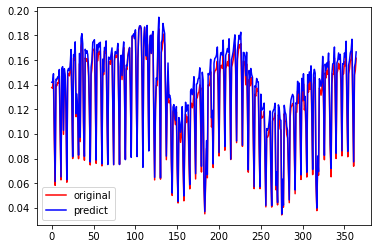

In [31]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델131.png')
plt.show()

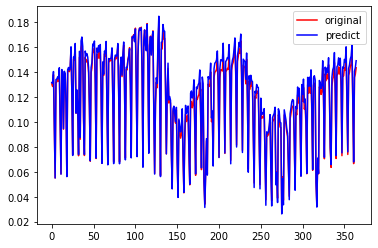

In [32]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델132.png')
plt.show()

# 모델4

In [33]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [34]:
X = tf.keras.layers.Input(shape=[9]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [35]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0091
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 7.1542e-04
Epoch 3/1000
23/23 [==============================] - 0s 909us/step - loss: 5.4311e-04
Epoch 4/1000
23/23 [==============================] - 0s 546us/step - loss: 3.1323e-04
Epoch 5/1000
23/23 [==============================] - 0s 591us/step - loss: 1.6601e-04
Epoch 6/1000
23/23 [==============================] - 0s 546us/step - loss: 1.4303e-04
Epoch 7/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1662e-04
Epoch 8/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1948e-04
Epoch 9/1000
23/23 [==============================] - 0s 546us/step - loss: 8.5827e-05
Epoch 10/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1566e-04
Epoch 11/1000
23/23 [==============================] - 0s 591us/step - loss: 9.9951e-05
Epoch 12/1000
23/23 [========================

23/23 [==============================] - 0s 546us/step - loss: 5.2682e-05
Epoch 187/1000
23/23 [==============================] - 0s 546us/step - loss: 3.2612e-05
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 4.5401e-05
Epoch 189/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7206e-05
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 4.5466e-05
Epoch 191/1000
23/23 [==============================] - 0s 591us/step - loss: 4.4249e-05
Epoch 192/1000
23/23 [==============================] - 0s 546us/step - loss: 3.9775e-05
Epoch 193/1000
23/23 [==============================] - 0s 546us/step - loss: 4.9541e-05
Epoch 194/1000
23/23 [==============================] - 0s 546us/step - loss: 3.9807e-05
Epoch 195/1000
23/23 [==============================] - 0s 546us/step - loss: 4.0205e-05
Epoch 196/1000
23/23 [==============================] - 0s 551us/step - loss: 4.0213e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 3.1541e-05
Epoch 371/1000
23/23 [==============================] - 0s 546us/step - loss: 3.1823e-05
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 3.3660e-05
Epoch 373/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9714e-05
Epoch 374/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9546e-05
Epoch 375/1000
23/23 [==============================] - 0s 546us/step - loss: 3.6038e-05
Epoch 376/1000
23/23 [==============================] - 0s 546us/step - loss: 2.8440e-05
Epoch 377/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9756e-05
Epoch 378/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1611e-05
Epoch 379/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6980e-05
Epoch 380/1000
23/23 [==============================] - 0s 546us/step - loss: 3.6735e-05
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.1941e-05
Epoch 555/1000
23/23 [==============================] - 0s 591us/step - loss: 2.3865e-05
Epoch 556/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9622e-05
Epoch 557/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6278e-05
Epoch 558/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9663e-05
Epoch 559/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8392e-05
Epoch 560/1000
23/23 [==============================] - 0s 591us/step - loss: 2.0486e-05
Epoch 561/1000
23/23 [==============================] - 0s 546us/step - loss: 2.7789e-05
Epoch 562/1000
23/23 [==============================] - 0s 591us/step - loss: 2.3037e-05
Epoch 563/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4134e-05
Epoch 564/1000
23/23 [==============================] - 0s 555us/step - loss: 2.6833e-05
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 818us/step - loss: 2.1996e-05
Epoch 739/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0597e-05
Epoch 740/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9330e-05
Epoch 741/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0770e-05
Epoch 742/1000
23/23 [==============================] - 0s 591us/step - loss: 2.2294e-05
Epoch 743/1000
23/23 [==============================] - 0s 591us/step - loss: 2.2387e-05
Epoch 744/1000
23/23 [==============================] - 0s 546us/step - loss: 2.1086e-05
Epoch 745/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0859e-05
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1663e-05
Epoch 747/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8126e-05
Epoch 748/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2617e-05
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 591us/step - loss: 1.6900e-05
Epoch 923/1000
23/23 [==============================] - 0s 591us/step - loss: 1.9169e-05
Epoch 924/1000
23/23 [==============================] - 0s 546us/step - loss: 2.1132e-05
Epoch 925/1000
23/23 [==============================] - 0s 546us/step - loss: 1.4933e-05
Epoch 926/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9907e-05
Epoch 927/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0347e-05
Epoch 928/1000
23/23 [==============================] - 0s 546us/step - loss: 1.6141e-05
Epoch 929/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0398e-05
Epoch 930/1000
23/23 [==============================] - 0s 591us/step - loss: 1.7692e-05
Epoch 931/1000
23/23 [==============================] - 0s 546us/step - loss: 1.7961e-05
Epoch 932/1000
23/23 [==============================] - 0s 546us/step - loss: 1.7931e-05
Epoch 933/1000
23/23 [==============

In [36]:
pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.006673508141990874

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.006083181675700142

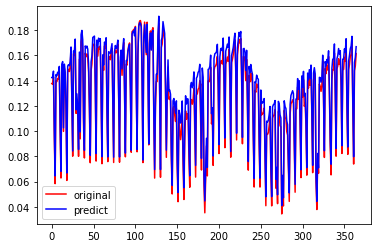

In [39]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델141.png')
plt.show()

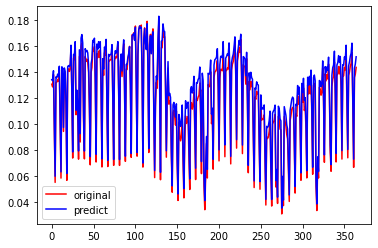

In [40]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델142.png')
plt.show()

# 모델5

In [41]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [42]:
X = tf.keras.layers.Input(shape=[4]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [43]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 0s 591us/step - loss: 0.0123
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 7.2956e-04
Epoch 3/1000
23/23 [==============================] - 0s 591us/step - loss: 5.7083e-04
Epoch 4/1000
23/23 [==============================] - 0s 591us/step - loss: 3.2992e-04
Epoch 5/1000
23/23 [==============================] - 0s 546us/step - loss: 1.6780e-04
Epoch 6/1000
23/23 [==============================] - 0s 591us/step - loss: 1.2677e-04
Epoch 7/1000
23/23 [==============================] - 0s 546us/step - loss: 7.1172e-05
Epoch 8/1000
23/23 [==============================] - 0s 591us/step - loss: 9.0498e-05
Epoch 9/1000
23/23 [==============================] - 0s 546us/step - loss: 6.9909e-05
Epoch 10/1000
23/23 [==============================] - 0s 546us/step - loss: 9.5626e-05
Epoch 11/1000
23/23 [==============================] - 0s 546us/step - loss: 6.1242e-05
Epoch 12/1000
23/23 [========================

23/23 [==============================] - 0s 546us/step - loss: 3.7026e-05
Epoch 187/1000
23/23 [==============================] - 0s 546us/step - loss: 3.8499e-05
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 3.6972e-05
Epoch 189/1000
23/23 [==============================] - 0s 500us/step - loss: 4.4701e-05
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7756e-05
Epoch 191/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8184e-05
Epoch 192/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8720e-05
Epoch 193/1000
23/23 [==============================] - 0s 546us/step - loss: 3.6808e-05
Epoch 194/1000
23/23 [==============================] - 0s 546us/step - loss: 4.1453e-05
Epoch 195/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8929e-05
Epoch 196/1000
23/23 [==============================] - 0s 500us/step - loss: 3.9886e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 2.6342e-05
Epoch 370/1000
23/23 [==============================] - 0s 546us/step - loss: 3.0883e-05
Epoch 371/1000
23/23 [==============================] - 0s 546us/step - loss: 2.8980e-05
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0128e-05
Epoch 373/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6765e-05
Epoch 374/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9243e-05
Epoch 375/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4425e-05
Epoch 376/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6278e-05
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0617e-05
Epoch 378/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6476e-05
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7550e-05
Epoch 380/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 2.1642e-05
Epoch 554/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0810e-05
Epoch 555/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4788e-05
Epoch 556/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0135e-05
Epoch 557/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1537e-05
Epoch 558/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2927e-05
Epoch 559/1000
23/23 [==============================] - 0s 546us/step - loss: 2.4848e-05
Epoch 560/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1741e-05
Epoch 561/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8354e-05
Epoch 562/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2019e-05
Epoch 563/1000
23/23 [==============================] - 0s 546us/step - loss: 2.3001e-05
Epoch 564/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.0274e-05
Epoch 738/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8903e-05
Epoch 739/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8584e-05
Epoch 740/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3086e-05
Epoch 741/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8502e-05
Epoch 742/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9868e-05
Epoch 743/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9778e-05
Epoch 744/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8592e-05
Epoch 745/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9368e-05
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 1.7663e-05
Epoch 747/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9103e-05
Epoch 748/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 1.6071e-05
Epoch 922/1000
23/23 [==============================] - 0s 546us/step - loss: 1.7381e-05
Epoch 923/1000
23/23 [==============================] - 0s 591us/step - loss: 1.7721e-05
Epoch 924/1000
23/23 [==============================] - 0s 546us/step - loss: 1.6446e-05
Epoch 925/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8777e-05
Epoch 926/1000
23/23 [==============================] - 0s 591us/step - loss: 1.5830e-05
Epoch 927/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8612e-05
Epoch 928/1000
23/23 [==============================] - 0s 587us/step - loss: 1.5878e-05
Epoch 929/1000
23/23 [==============================] - 0s 546us/step - loss: 1.7059e-05
Epoch 930/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8089e-05
Epoch 931/1000
23/23 [==============================] - 0s 546us/step - loss: 2.0450e-05
Epoch 932/1000
23/23 [==============

In [44]:
pred = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.005610495908017877

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.0049407661249571706

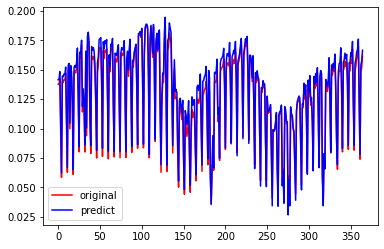

In [47]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델151.png')
plt.show()

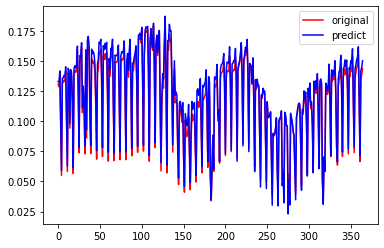

In [48]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델152.png')
plt.show()

# 모델6

In [49]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [50]:
X = tf.keras.layers.Input(shape=[7]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [51]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 1s 529us/step - loss: 0.0182
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0014
Epoch 3/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0014
Epoch 4/1000
23/23 [==============================] - 0s 500us/step - loss: 0.0013
Epoch 5/1000
23/23 [==============================] - 0s 500us/step - loss: 0.0012
Epoch 6/1000
23/23 [==============================] - 0s 500us/step - loss: 0.0012
Epoch 7/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0011
Epoch 8/1000
23/23 [==============================] - 0s 546us/step - loss: 0.0011
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 9.7862e-04
Epoch 10/1000
23/23 [==============================] - 0s 500us/step - loss: 9.6553e-04
Epoch 11/1000
23/23 [==============================] - 0s 500us/step - loss: 9.0893e-04
Epoch 12/1000
23/23 [==============================] - 0s 500us/step - lo

23/23 [==============================] - 0s 500us/step - loss: 3.3751e-04
Epoch 187/1000
23/23 [==============================] - 0s 500us/step - loss: 3.4137e-04
Epoch 188/1000
23/23 [==============================] - 0s 546us/step - loss: 3.6019e-04
Epoch 189/1000
23/23 [==============================] - 0s 546us/step - loss: 3.6883e-04
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 3.3253e-04
Epoch 191/1000
23/23 [==============================] - 0s 500us/step - loss: 3.4653e-04
Epoch 192/1000
23/23 [==============================] - 0s 500us/step - loss: 3.3725e-04
Epoch 193/1000
23/23 [==============================] - 0s 500us/step - loss: 3.4377e-04
Epoch 194/1000
23/23 [==============================] - 0s 546us/step - loss: 3.6324e-04
Epoch 195/1000
23/23 [==============================] - 0s 546us/step - loss: 3.4655e-04
Epoch 196/1000
23/23 [==============================] - 0s 500us/step - loss: 3.4324e-04
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 3.0549e-04
Epoch 371/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9204e-04
Epoch 372/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9691e-04
Epoch 373/1000
23/23 [==============================] - 0s 546us/step - loss: 2.8926e-04
Epoch 374/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0002e-04
Epoch 375/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0662e-04
Epoch 376/1000
23/23 [==============================] - 0s 546us/step - loss: 3.0090e-04
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8454e-04
Epoch 378/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9651e-04
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9759e-04
Epoch 380/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0487e-04
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.7513e-04
Epoch 555/1000
23/23 [==============================] - 0s 546us/step - loss: 2.7384e-04
Epoch 556/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8227e-04
Epoch 557/1000
23/23 [==============================] - 0s 546us/step - loss: 2.7211e-04
Epoch 558/1000
23/23 [==============================] - 0s 546us/step - loss: 2.7459e-04
Epoch 559/1000
23/23 [==============================] - 0s 546us/step - loss: 2.7368e-04
Epoch 560/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8898e-04
Epoch 561/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9076e-04
Epoch 562/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6480e-04
Epoch 563/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7598e-04
Epoch 564/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6457e-04
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 2.5351e-04
Epoch 739/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6162e-04
Epoch 740/1000
23/23 [==============================] - 0s 546us/step - loss: 2.5617e-04
Epoch 741/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6205e-04
Epoch 742/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6656e-04
Epoch 743/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6118e-04
Epoch 744/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6167e-04
Epoch 745/1000
23/23 [==============================] - 0s 546us/step - loss: 2.6866e-04
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 2.5911e-04
Epoch 747/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6460e-04
Epoch 748/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6522e-04
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 2.4734e-04
Epoch 923/1000
23/23 [==============================] - 0s 546us/step - loss: 2.3661e-04
Epoch 924/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4262e-04
Epoch 925/1000
23/23 [==============================] - 0s 499us/step - loss: 2.5281e-04
Epoch 926/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4193e-04
Epoch 927/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4384e-04
Epoch 928/1000
23/23 [==============================] - 0s 506us/step - loss: 2.4535e-04
Epoch 929/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4207e-04
Epoch 930/1000
23/23 [==============================] - 0s 546us/step - loss: 2.5618e-04
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4530e-04
Epoch 932/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4806e-04
Epoch 933/1000
23/23 [==============

In [52]:
pred = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.031104227680400044

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.027418645371477583

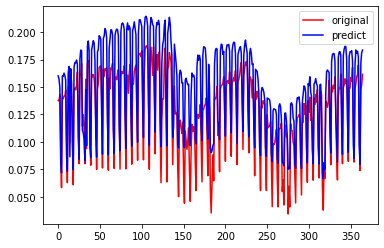

In [55]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델161.png')
plt.show()

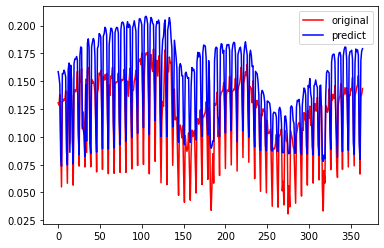

In [56]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델162.png')
plt.show()

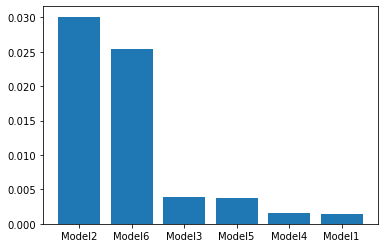

In [61]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(6)
years = ['Model2', 'Model6', 'Model3', 'Model5', 'Model4', 'Model1']
values = [0.030109, 0.025418, 0.003899, 0.003749, 0.001597, 0.001392]

plt.bar(x, values)
plt.xticks(x, years)
plt.savefig('공릉변화.png')
plt.show()

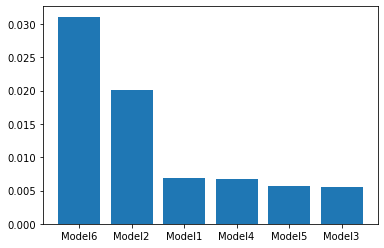

In [62]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(6)
years = ['Model6', 'Model2', 'Model1', 'Model4', 'Model5', 'Model3']
values = [0.031104, 0.020135, 0.006937, 0.006674, 0.005610, 0.005522]

plt.bar(x, values)
plt.xticks(x, years)
plt.savefig('종로변화.png')
plt.show()